<a href="https://colab.research.google.com/github/khirotaka/tigerfish/blob/master/notebooks/hello-python/No1_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Irisデータセットを使ってkNNを体験する

## ライブラリのインポート

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

## ハイパーパラメータとデータセットの準備

In [ ]:
k = 5
seed = 1
d1 = 0
d2 = 1

iris = datasets.load_iris()
x = iris.data[:, [d1, d2]]
y = iris.target

x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.3, random_state=seed)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

## kNNの学習

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## 分類精度の算出

In [ ]:
train_acc = accuracy_score(y_train, knn.predict(x_train_std))
test_acc = accuracy_score(y_test, knn.predict(x_test_std))

print("k={}, features=({}, {})".format(k, d1, d2))
print("Training accuracy: {:.4%}".format(train_acc))
print("Test_accuracy:     {:.4%}".format(test_acc))

k=5, features=(0, 1)
Training accuracy: 85.7143%
Test_accuracy:     68.8889%


## 識別境界面をプロット

### 訓練用データセットを使った場合

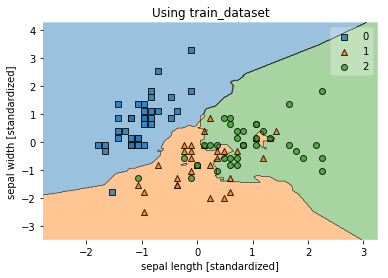

In [ ]:
plt.title("Using train_dataset")
plt.xlabel("sepal length [standardized]")
plt.ylabel("sepal width [standardized]")
plot_decision_regions(x_train_std, y_train, clf=knn)

### 試験用データセットを使った場合

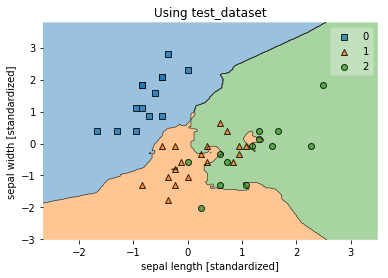

In [ ]:
plt.title("Using test_dataset")
plt.xlabel("sepal length [standardized]")
plt.ylabel("sepal width [standardized]")
plot_decision_regions(x_test_std, y_test, clf=knn)